Data Loading
============

Once you know the `products` or `datasets` that you are interested in, you can load data using `dc.load()`.

Loading Datasets
----------------

One way to load data from a datacube is to pass a list of datasets to `dc.load()`.
For example, we can load the `ls9_sr` datasets we found in the previous [Data Searching](data-searching.ipynb) example by passing them to `dc.load()`'s `datasets` parameter.

To load data for a subset of measurements, we can supply them to `dc.load()`'s `measurements` parameter (here we use the `red`, `green`, `blue` measurement alias names  that we obtained in the [Product Discovery](product-discovery.ipynb) example). For indexed datacube products, we also need to supply our desired output coordinate reference system (`output_crs`) and output resolution (`resolution`). 
Datacube will then resample and reproject our data to match these inputs.


In [1]:
import datacube

dc = datacube.Datacube(app="my_analysis")

datasets = dc.find_datasets(
    product="ls9_sr",
    x=(29.0, 29.01),
    y=(25.0, 25.01),
    time=("2022-01-01", "2022-02-01"),
)

ds = dc.load(
    datasets=datasets,
    measurements=["red", "green", "blue"],
    output_crs="EPSG:6933",
    resolution=(-30, 30),
)
ds

<xarray.Dataset>
Dimensions:      (time: 2, y: 8119, x: 7192)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-15T08:31:52.404426 2022-01-31T...
  * y            (y) float64 3.16e+06 3.16e+06 3.16e+06 ... 2.917e+06 2.917e+06
  * x            (x) float64 2.684e+06 2.685e+06 2.685e+06 ... 2.9e+06 2.9e+06
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    green        (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    blue         (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

We can see that `dc.load` has returned an `xarray.Dataset` containing data from our two input datasets.
This `xarray.Dataset` includes:

> _Dimensions_
>
> * This header identifies the number of timesteps returned `(time: 2)` as well as the number of resulting pixels in the `x` and `y` directions.
>
> _Coordinates_
>
> * `time` identifies the time attributed to each returned timestep.
> * `x` and `y` provide coordinates for each pixel within the returned data.
> * `spatial_ref` provides information about the spatial grid used to load the data
>
> _Data variables_
>
> * These are the measurements available for the loaded product. 
> For every timestep (`time`) returned by the query, the measured value at each pixel (`y`, `x`) is returned as an array for each measurement. 
> Each data variable is itself an `xarray.DataArray` object.
>
> _Attributes_
>
> * Other important metadata or attributes for the loaded data

We can also inspect our loaded data by plotting it:

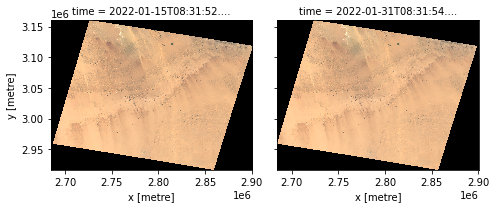

In [2]:
ds[["red", "green", "blue"]].to_array().plot.imshow(col="time", robust=True)

## Querying and Loading

We can see in the image above that `dc.load()` has loaded the entire input datasets, which for Landsat 9 includes the extent of a full satellite path-row scene.

Instead, we may prefer to load a subset of data for a specific spatial and temporal extent. To do this, we can query and load data directly with `dc.load()` without first searching for datasets using `dc.find_datasets()`.

To achieve this, we can pass all the inputs we originally passed to `dc.find_datasets()` (e.g. `product`, `x`, `y`, `time`) to `dc.load()` instead:

In [3]:
ds = dc.load(
    product="ls9_sr",
    x=(29.0, 29.1),
    y=(25.0, 25.1),
    time=("2022-01-01", "2022-02-01"),
    measurements=["red", "green", "blue"],
    output_crs="EPSG:6933",
    resolution=(-30, 30),
)
ds

<xarray.Dataset>
Dimensions:      (time: 2, y: 388, x: 322)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-15T08:31:52.404426 2022-01-31T...
  * y            (y) float64 3.103e+06 3.103e+06 ... 3.092e+06 3.092e+06
  * x            (x) float64 2.798e+06 2.798e+06 ... 2.808e+06 2.808e+06
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) uint16 22285 22517 22302 ... 21193 22230 20021
    green        (time, y, x) uint16 17701 17715 17627 ... 16897 17321 16152
    blue         (time, y, x) uint16 13124 13073 13038 ... 12580 12743 12352
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

We can see from `Dimensions` that a much smaller set of pixels have now been loaded compared to the previous time we called `dc.load()`.

If we plot our new `xarray.Dataset`, we can see that `dc.load()` has now loaded data for only the specific `x` and `y` ranges we specified:

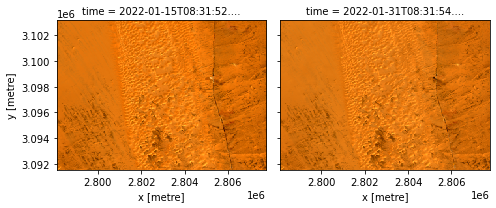

In [4]:
ds[["red", "green", "blue"]].to_array().plot.imshow(col="time", robust=True)